<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Bioestatistica_2025_opcao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística descritiva

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Geração de Dados Simulados

Simulando um estudo sobre o crescimento de plantas e a presença de uma proteína.


In [ ]:
np.random.seed(42) # Para reprodutibilidade

# Dados para Variáveis Qualitativas e Quantitativas Discretas
data = {
    'ID_Amostra': range(1, 101),
    'Tipo_Solo': np.random.choice(['Arenoso', 'Argiloso', 'Orgânico'], 100, p=[0.35, 0.35, 0.30]),
    'Regiao_Coleta': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste'], 100, p=[0.25, 0.25, 0.25, 0.25]),
    'Numero_Folhas': np.random.randint(5, 25, 100), # Variável Quantitativa Discreta
    'Estagio_Crescimento': np.random.choice(['Inicial', 'Medio', 'Final'], 100, p=[0.3, 0.4, 0.3]), # Variável Qualitativa Ordinal
}
df = pd.DataFrame(data)

# Dados para Variáveis Quantitativas Contínuas
# Altura da planta (cm) - com ligeira diferença por tipo de solo
df['Altura_Planta_cm'] = np.where(
    df['Tipo_Solo'] == 'Orgânico',
    np.random.normal(loc=30, scale=5, size=df.shape[0]),
    np.where(
        df['Tipo_Solo'] == 'Argiloso',
        np.random.normal(loc=25, scale=4, size=df.shape[0]),
        np.random.normal(loc=20, scale=3, size=df.shape[0])
    )
)
df['Altura_Planta_cm'] = df['Altura_Planta_cm'].apply(lambda x: max(5, x)) # Garante valores mínimos realistas

# Concentração de Proteína (mg/L) - pode ter alguns outliers
df['Concentracao_Proteina_mgL'] = np.random.normal(loc=15, scale=3, size=100)

# Adicionando alguns outliers
df.loc[np.random.choice(df.index, 3, replace=False), 'Concentracao_Proteina_mgL'] = np.random.uniform(30, 40, 3)
df['Concentracao_Proteina_mgL'] = df['Concentracao_Proteina_mgL'].apply(lambda x: max(1, x)) # Garante valores mínimos realistas


print("Amostra dos Dados Gerados:")
print(df.head())

Amostra dos Dados Gerados:
   ID_Amostra Tipo_Solo Regiao_Coleta  Numero_Folhas Estagio_Crescimento  \
0           1  Argiloso         Norte             24             Inicial   
1           2  Orgânico         Leste             15               Final   
2           3  Orgânico           Sul             21               Medio   
3           4  Argiloso         Leste             12             Inicial   
4           5   Arenoso         Oeste              8               Medio   

   Altura_Planta_cm  Concentracao_Proteina_mgL  
0         29.241787                  11.824844  
1         23.897149                  13.461257  
2         26.653986                  15.511783  
3         23.784542                  17.506696  
4         18.854269                  12.327470  


In [ ]:
print("\nInformações sobre os tipos de dados:")
df.info()
print("-" * 60)


Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Amostra                 100 non-null    int64  
 1   Tipo_Solo                  100 non-null    object 
 2   Regiao_Coleta              100 non-null    object 
 3   Numero_Folhas              100 non-null    int64  
 4   Estagio_Crescimento        100 non-null    object 
 5   Altura_Planta_cm           100 non-null    float64
 6   Concentracao_Proteina_mgL  100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB
------------------------------------------------------------


In [ ]:
# --- 2. Tipos de Variáveis ---
print("\n--- 2. Tipos de Variáveis ---")
print("Em nosso DataFrame, temos os seguintes tipos de variáveis:")
print(f"- **ID_Amostra:** Qualitativa Nominal (Identificador único)")
print(f"- **Tipo_Solo:** Qualitativa Nominal (Categorias sem ordem: Arenoso, Argiloso, Orgânico)")
print(f"- **Regiao_Coleta:** Qualitativa Nominal (Categorias sem ordem: Norte, Sul, Leste, Oeste)")
print(f"- **Numero_Folhas:** Quantitativa Discreta (Resulta de contagem, valores inteiros)")
print(f"- **Estagio_Crescimento:** Qualitativa Ordinal (Categorias com ordem: Inicial < Medio < Final)")
print(f"- **Altura_Planta_cm:** Quantitativa Contínua (Resulta de medição, pode assumir qualquer valor)")
print(f"- **Concentracao_Proteina_mgL:** Quantitativa Contínua (Resulta de medição, pode assumir qualquer valor)")
print("-" * 60)


--- 2. Tipos de Variáveis ---
Em nosso DataFrame, temos os seguintes tipos de variáveis:
- **ID_Amostra:** Qualitativa Nominal (Identificador único)
- **Tipo_Solo:** Qualitativa Nominal (Categorias sem ordem: Arenoso, Argiloso, Orgânico)
- **Regiao_Coleta:** Qualitativa Nominal (Categorias sem ordem: Norte, Sul, Leste, Oeste)
- **Numero_Folhas:** Quantitativa Discreta (Resulta de contagem, valores inteiros)
- **Estagio_Crescimento:** Qualitativa Ordinal (Categorias com ordem: Inicial < Medio < Final)
- **Altura_Planta_cm:** Quantitativa Contínua (Resulta de medição, pode assumir qualquer valor)
- **Concentracao_Proteina_mgL:** Quantitativa Contínua (Resulta de medição, pode assumir qualquer valor)
------------------------------------------------------------


In [ ]:
# --- 3. Organização de Dados: Tabelas de Frequência ---
print("\n--- 3. Organização de Dados: Tabelas de Frequência ---")

# Tabela de Frequência para Variável Qualitativa Nominal (Tipo_Solo)
print("\n**Frequência do Tipo de Solo:**")
freq_solo = df['Tipo_Solo'].value_counts().reset_index()
freq_solo.columns = ['Tipo_Solo', 'Frequencia_Absoluta']
freq_solo['Frequencia_Relativa'] = freq_solo['Frequencia_Absoluta'] / len(df)
freq_solo['Frequencia_Percentual'] = freq_solo['Frequencia_Relativa'] * 100
print(freq_solo)


--- 3. Organização de Dados: Tabelas de Frequência ---

**Frequência do Tipo de Solo:**
  Tipo_Solo  Frequencia_Absoluta  Frequencia_Relativa  Frequencia_Percentual
0   Arenoso                   41                 0.41                   41.0
1  Orgânico                   30                 0.30                   30.0
2  Argiloso                   29                 0.29                   29.0


In [ ]:
# Tabela de Frequência para Variável Qualitativa Ordinal (Estagio_Crescimento)
# É importante ordenar para variáveis ordinais
print("\n**Frequência do Estágio de Crescimento:**")
estagio_ordem = ['Inicial', 'Medio', 'Final']
freq_estagio = df['Estagio_Crescimento'].value_counts().reindex(estagio_ordem).reset_index()
freq_estagio.columns = ['Estagio_Crescimento', 'Frequencia_Absoluta']
freq_estagio['Frequencia_Relativa'] = freq_estagio['Frequencia_Absoluta'] / len(df)
freq_estagio['Frequencia_Percentual'] = freq_estagio['Frequencia_Relativa'] * 100
freq_estagio['Frequencia_Acumulada'] = freq_estagio['Frequencia_Absoluta'].cumsum()
print(freq_estagio)


**Frequência do Estágio de Crescimento:**
  Estagio_Crescimento  Frequencia_Absoluta  Frequencia_Relativa  \
0             Inicial                   34                 0.34   
1               Medio                   40                 0.40   
2               Final                   26                 0.26   

   Frequencia_Percentual  Frequencia_Acumulada  
0                   34.0                    34  
1                   40.0                    74  
2                   26.0                   100  


In [ ]:
# Tabela de Frequência para Variável Quantitativa Contínua (Altura_Planta_cm) - com agrupamento
print("\n**Frequência da Altura da Planta (cm) - Classes:**")
# Definindo as classes (bins)
bins = [0, 15, 20, 25, 30, 35, 40] # Exemplo de classes
labels = ['0-15', '15-20', '20-25', '25-30', '30-35', '35-40']
df['Altura_Classe'] = pd.cut(df['Altura_Planta_cm'], bins=bins, labels=labels, right=False)

freq_altura = df['Altura_Classe'].value_counts(sort=False).reset_index()
freq_altura.columns = ['Classe_Altura_cm', 'Frequencia_Absoluta']
freq_altura['Frequencia_Relativa'] = freq_altura['Frequencia_Absoluta'] / len(df)
freq_altura['Frequencia_Percentual'] = freq_altura['Frequencia_Relativa'] * 100
freq_altura['Frequencia_Acumulada'] = freq_altura['Frequencia_Absoluta'].cumsum()
print(freq_altura)
print("-" * 60)


**Frequência da Altura da Planta (cm) - Classes:**
  Classe_Altura_cm  Frequencia_Absoluta  Frequencia_Relativa  \
0             0-15                    2                 0.02   
1            15-20                   26                 0.26   
2            20-25                   37                 0.37   
3            25-30                   17                 0.17   
4            30-35                   15                 0.15   
5            35-40                    3                 0.03   

   Frequencia_Percentual  Frequencia_Acumulada  
0                    2.0                     2  
1                   26.0                    28  
2                   37.0                    65  
3                   17.0                    82  
4                   15.0                    97  
5                    3.0                   100  
------------------------------------------------------------


## Representação Gráfica dos Dados

/tmp/ipython-input-2102537105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tipo_Solo', data=df, palette='viridis', order=df['Tipo_Solo'].value_counts().index)


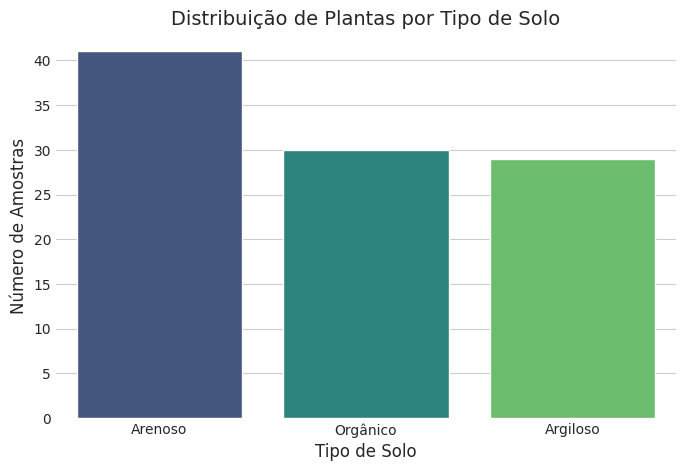

In [ ]:
# Gráfico de Barras para Variável Qualitativa (Tipo_Solo)
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Solo', data=df, palette='viridis', order=df['Tipo_Solo'].value_counts().index)
plt.title('Distribuição de Plantas por Tipo de Solo')
plt.xlabel('Tipo de Solo')
plt.ylabel('Número de Amostras')
plt.show()

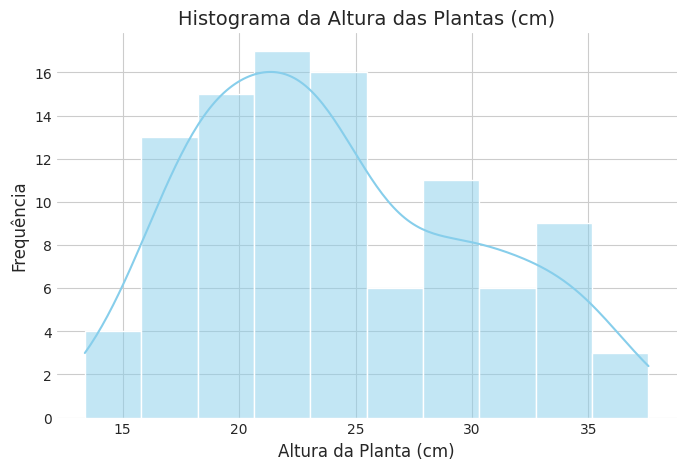

In [ ]:
# Histograma para Variável Quantitativa Contínua (Altura_Planta_cm)
plt.figure(figsize=(8, 5))
sns.histplot(df['Altura_Planta_cm'], bins=10, kde=True, color='skyblue')
plt.title('Histograma da Altura das Plantas (cm)')
plt.xlabel('Altura da Planta (cm)')
plt.ylabel('Frequência')
plt.show()

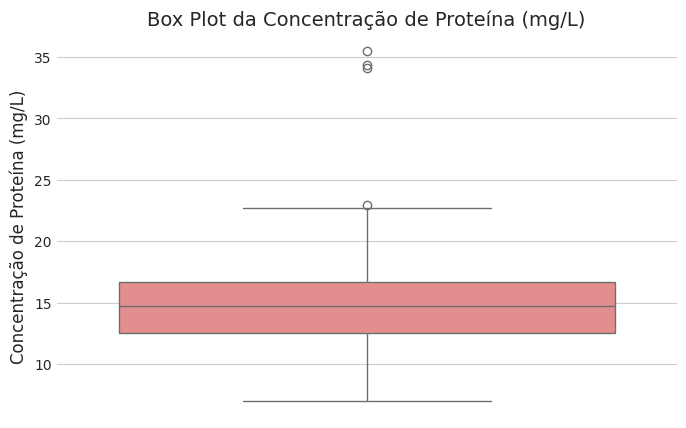

In [ ]:
# Box Plot para Variável Quantitativa Contínua (Concentracao_Proteina_mgL)
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Concentracao_Proteina_mgL'], color='lightcoral')
plt.title('Box Plot da Concentração de Proteína (mg/L)')
plt.ylabel('Concentração de Proteína (mg/L)')
plt.show()

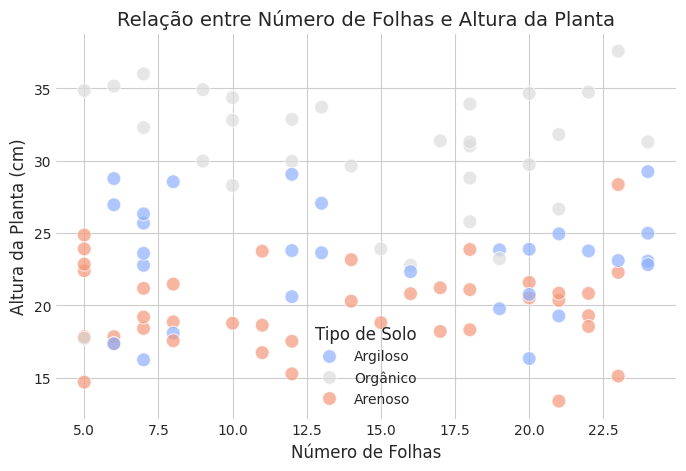

------------------------------------------------------------


In [ ]:
# Diagrama de Dispersão (Altura_Planta_cm vs. Numero_Folhas)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Numero_Folhas', y='Altura_Planta_cm', data=df, hue='Tipo_Solo', palette='coolwarm', s=100, alpha=0.7)
plt.title('Relação entre Número de Folhas e Altura da Planta')
plt.xlabel('Número de Folhas')
plt.ylabel('Altura da Planta (cm)')
plt.legend(title='Tipo de Solo')
plt.show()
print("-" * 60)

In [ ]:
# --- 5. Medidas de Tendência Central ---
print("\n--- 5. Medidas de Tendência Central ---")

# Para Altura_Planta_cm
print("\n**Medidas de Tendência Central para Altura da Planta (cm):**")
media_altura = df['Altura_Planta_cm'].mean()
mediana_altura = df['Altura_Planta_cm'].median()
moda_altura = df['Altura_Planta_cm'].mode()[0] # .mode() pode retornar múltiplos valores, pegamos o primeiro

print(f"Média: {media_altura:.2f} cm")
print(f"Mediana: {mediana_altura:.2f} cm")
print(f"Moda: {moda_altura:.2f} cm (valor mais frequente)")


--- 5. Medidas de Tendência Central ---

**Medidas de Tendência Central para Altura da Planta (cm):**
Média: 24.11 cm
Mediana: 23.13 cm
Moda: 13.38 cm (valor mais frequente)


In [ ]:
# Para Numero_Folhas
print("\n**Medidas de Tendência Central para Número de Folhas:**")
media_folhas = df['Numero_Folhas'].mean()
mediana_folhas = df['Numero_Folhas'].median()
moda_folhas = df['Numero_Folhas'].mode()[0]

print(f"Média: {media_folhas:.2f} folhas")
print(f"Mediana: {mediana_folhas:.0f} folhas") # Número de folhas é discreto
print(f"Moda: {moda_folhas:.0f} folhas")
print("-" * 60)


**Medidas de Tendência Central para Número de Folhas:**
Média: 14.09 folhas
Mediana: 14 folhas
Moda: 7 folhas
------------------------------------------------------------


In [ ]:
# --- 6. Medidas de Dispersão ---
print("\n--- 6. Medidas de Dispersão ---")

# Para Altura_Planta_cm
print("\n**Medidas de Dispersão para Altura da Planta (cm):**")
amplitude_altura = df['Altura_Planta_cm'].max() - df['Altura_Planta_cm'].min()
variancia_altura = df['Altura_Planta_cm'].var() # Variância amostral por padrão (ddof=1)
desvio_padrao_altura = df['Altura_Planta_cm'].std() # Desvio padrão amostral por padrão (ddof=1)
cv_altura = (desvio_padrao_altura / media_altura) * 100

print(f"Amplitude Total: {amplitude_altura:.2f} cm")
print(f"Variância: {variancia_altura:.2f} cm²")
print(f"Desvio Padrão: {desvio_padrao_altura:.2f} cm")
print(f"Coeficiente de Variação (CV): {cv_altura:.2f}% (Baixo, indica pouca variabilidade relativa)")


--- 6. Medidas de Dispersão ---

**Medidas de Dispersão para Altura da Planta (cm):**
Amplitude Total: 24.21 cm
Variância: 34.38 cm²
Desvio Padrão: 5.86 cm
Coeficiente de Variação (CV): 24.32% (Baixo, indica pouca variabilidade relativa)


In [ ]:
# Para Concentracao_Proteina_mgL (que tem outliers)
print("\n**Medidas de Dispersão para Concentração de Proteína (mg/L):**")
amplitude_proteina = df['Concentracao_Proteina_mgL'].max() - df['Concentracao_Proteina_mgL'].min()
variancia_proteina = df['Concentracao_Proteina_mgL'].var()
desvio_padrao_proteina = df['Concentracao_Proteina_mgL'].std()
cv_proteina = (desvio_padrao_proteina / df['Concentracao_Proteina_mgL'].mean()) * 100

print(f"Amplitude Total: {amplitude_proteina:.2f} mg/L")
print(f"Variância: {variancia_proteina:.2f} (mg/L)²")
print(f"Desvio Padrão: {desvio_padrao_proteina:.2f} mg/L")
print(f"Coeficiente de Variação (CV): {cv_proteina:.2f}% (Maior, indica mais variabilidade relativa, possivelmente devido a outliers)")
print("-" * 60)


**Medidas de Dispersão para Concentração de Proteína (mg/L):**
Amplitude Total: 28.50 mg/L
Variância: 21.56 (mg/L)²
Desvio Padrão: 4.64 mg/L
Coeficiente de Variação (CV): 30.43% (Maior, indica mais variabilidade relativa, possivelmente devido a outliers)
------------------------------------------------------------


In [ ]:
# --- 7. Medidas de Posição (Separatrizes) ---
print("\n--- 7. Medidas de Posição (Separatrizes) ---")

# Para Altura_Planta_cm
print("\n**Medidas de Posição para Altura da Planta (cm):**")
Q1_altura = df['Altura_Planta_cm'].quantile(0.25)
Q2_altura_mediana = df['Altura_Planta_cm'].quantile(0.50) # Mediana
Q3_altura = df['Altura_Planta_cm'].quantile(0.75)
IQR_altura = Q3_altura - Q1_altura

print(f"1º Quartil (Q1): {Q1_altura:.2f} cm")
print(f"2º Quartil (Q2 - Mediana): {Q2_altura_mediana:.2f} cm")
print(f"3º Quartil (Q3): {Q3_altura:.2f} cm")
print(f"Intervalo Interquartil (IQR): {IQR_altura:.2f} cm")


--- 7. Medidas de Posição (Separatrizes) ---

**Medidas de Posição para Altura da Planta (cm):**
1º Quartil (Q1): 19.25 cm
2º Quartil (Q2 - Mediana): 23.13 cm
3º Quartil (Q3): 28.77 cm
Intervalo Interquartil (IQR): 9.53 cm


In [ ]:
# Identificando Outliers (exemplo simples usando IQR)
limite_inferior = Q1_altura - 1.5 * IQR_altura
limite_superior = Q3_altura + 1.5 * IQR_altura
outliers_altura = df[(df['Altura_Planta_cm'] < limite_inferior) | (df['Altura_Planta_cm'] > limite_superior)]

print(f"Limites para identificação de outliers (IQR): Inferior={limite_inferior:.2f}, Superior={limite_superior:.2f}")
if not outliers_altura.empty:
    print(f"Outliers de Altura da Planta detectados ({len(outliers_altura)}):")
    print(outliers_altura[['ID_Amostra', 'Altura_Planta_cm']])
else:
    print("Nenhum outlier de Altura da Planta detectado com base no critério IQR.")

# Box Plot (já mostrado acima, mas reforça a interpretação aqui)
print("\nUm **Box Plot** (Diagrama de Caixa) é uma excelente forma visual de resumir as medidas de posição e identificar outliers.")
print("O gráfico mostrado anteriormente para 'Concentracao_Proteina_mgL' é um exemplo prático.")
print("-" * 60)

Limites para identificação de outliers (IQR): Inferior=4.95, Superior=43.07
Nenhum outlier de Altura da Planta detectado com base no critério IQR.

Um **Box Plot** (Diagrama de Caixa) é uma excelente forma visual de resumir as medidas de posição e identificar outliers.
O gráfico mostrado anteriormente para 'Concentracao_Proteina_mgL' é um exemplo prático.
------------------------------------------------------------


In [ ]:
# --- 8. Medidas de Forma ---
print("\n--- 8. Medidas de Forma ---")

# Assimetria (Skewness) para Altura_Planta_cm
skewness_altura = df['Altura_Planta_cm'].skew()
print(f"\n**Assimetria (Skewness) da Altura da Planta (cm):**")
print(f"Valor do Skewness: {skewness_altura:.3f}")
if skewness_altura > 0.1:
    print("A distribuição da Altura da Planta é ligeiramente **assimétrica positiva (à direita)**. Isso sugere que a cauda direita da distribuição é mais longa, e a média é provavelmente maior que a mediana.")
elif skewness_altura < -0.1:
    print("A distribuição da Altura da Planta é ligeiramente **assimétrica negativa (à esquerda)**. Isso sugere que a cauda esquerda da distribuição é mais longa, e a média é provavelmente menor que a mediana.")
else:
    print("A distribuição da Altura da Planta é aproximadamente **simétrica**.")


--- 8. Medidas de Forma ---

**Assimetria (Skewness) da Altura da Planta (cm):**
Valor do Skewness: 0.461
A distribuição da Altura da Planta é ligeiramente **assimétrica positiva (à direita)**. Isso sugere que a cauda direita da distribuição é mais longa, e a média é provavelmente maior que a mediana.


In [ ]:
# Assimetria (Skewness) para Concentracao_Proteina_mgL (com outliers, que tendem a causar assimetria)
skewness_proteina = df['Concentracao_Proteina_mgL'].skew()
print(f"\n**Assimetria (Skewness) da Concentração de Proteína (mg/L):**")
print(f"Valor do Skewness: {skewness_proteina:.3f}")
if skewness_proteina > 0.1:
    print("A distribuição da Concentração de Proteína é **assimétrica positiva (à direita)**. Os outliers de alta concentração contribuem para essa assimetria, puxando a média para valores mais altos que a mediana.")
elif skewness_proteina < -0.1:
    print("A distribuição da Concentração de Proteína é assimétrica negativa (à esquerda).")
else:
    print("A distribuição da Concentração de Proteína é aproximadamente simétrica.")


**Assimetria (Skewness) da Concentração de Proteína (mg/L):**
Valor do Skewness: 2.149
A distribuição da Concentração de Proteína é **assimétrica positiva (à direita)**. Os outliers de alta concentração contribuem para essa assimetria, puxando a média para valores mais altos que a mediana.


In [ ]:
# Curtose (Kurtosis)
kurtosis_altura = df['Altura_Planta_cm'].kurtosis()
kurtosis_proteina = df['Concentracao_Proteina_mgL'].kurtosis()

print(f"\n**Curtose (Kurtosis) da Altura da Planta (cm):** {kurtosis_altura:.3f}")
if kurtosis_altura > 0:
    print("A distribuição é **leptocúrtica**, ou seja, tem um pico mais agudo e caudas mais pesadas (mais dados nas extremidades) que uma distribuição normal.")
else:
    print("A distribuição é **platicúrtica** ou **mesocúrtica** (similar à normal).")

print(f"\n**Curtose (Kurtosis) da Concentração de Proteína (mg/L):** {kurtosis_proteina:.3f}")
if kurtosis_proteina > 0:
    print("A distribuição é **leptocúrtica**, indicando um pico mais agudo e a presença de outliers que contribuem para caudas mais pesadas.")
else:
    print("A distribuição é **platicúrtica** ou **mesocúrtica** (similar à normal).")
print("-" * 60)

print("\n--- Fim do Script de Estatística Descritiva ---")


**Curtose (Kurtosis) da Altura da Planta (cm):** -0.752
A distribuição é **platicúrtica** ou **mesocúrtica** (similar à normal).

**Curtose (Kurtosis) da Concentração de Proteína (mg/L):** 7.516
A distribuição é **leptocúrtica**, indicando um pico mais agudo e a presença de outliers que contribuem para caudas mais pesadas.
------------------------------------------------------------

--- Fim do Script de Estatística Descritiva ---


## Regressão linear simples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# --- 1. Geração de Dados Simulados (Exemplo Biológico: Idade vs. Peso) ---
np.random.seed(42) # Para reprodutibilidade dos resultados

# Variável Independente (X): Idade do animal em meses
idade = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Variável Dependente (Y): Peso do animal em kg
# Vamos simular uma relação linear positiva com algum ruído
# Peso = 1.5 * Idade + 5 + Ruído Aleatório
peso = 1.5 * idade + 5 + np.random.normal(0, 1.5, len(idade))

print("--- Dados Simulados ---")
for i in range(len(idade)):
    print(f"Idade: {idade[i]:2d} meses, Peso: {peso[i]:.2f} kg")
print("-" * 30)

--- Dados Simulados ---
Idade:  1 meses, Peso: 7.25 kg
Idade:  2 meses, Peso: 7.79 kg
Idade:  3 meses, Peso: 10.47 kg
Idade:  4 meses, Peso: 13.28 kg
Idade:  5 meses, Peso: 12.15 kg
Idade:  6 meses, Peso: 13.65 kg
Idade:  7 meses, Peso: 17.87 kg
Idade:  8 meses, Peso: 18.15 kg
Idade:  9 meses, Peso: 17.80 kg
Idade: 10 meses, Peso: 20.81 kg
Idade: 11 meses, Peso: 20.80 kg
Idade: 12 meses, Peso: 22.30 kg
Idade: 13 meses, Peso: 24.86 kg
Idade: 14 meses, Peso: 23.13 kg
Idade: 15 meses, Peso: 24.91 kg
------------------------------


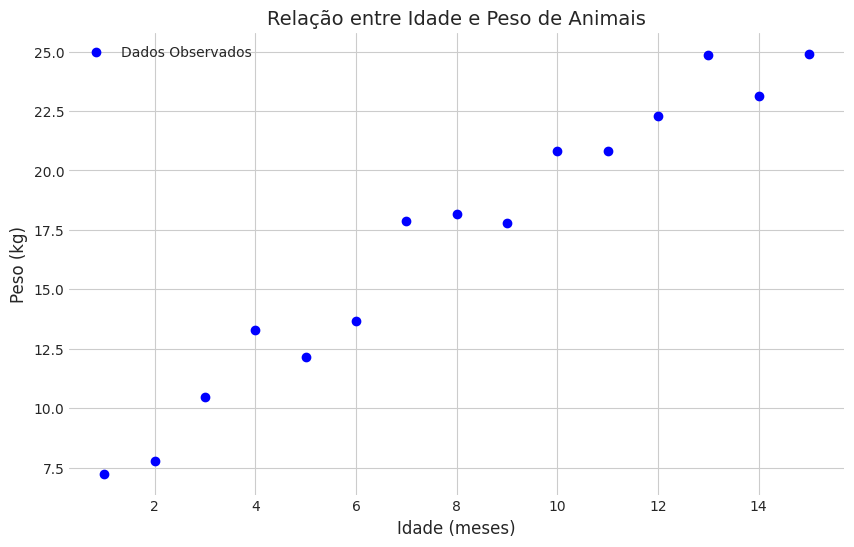

In [ ]:
# --- 2. Visualização Inicial dos Dados (Gráfico de Dispersão) ---
plt.figure(figsize=(10, 6))
plt.scatter(idade, peso, color='blue', label='Dados Observados')
plt.title('Relação entre Idade e Peso de Animais')
plt.xlabel('Idade (meses)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# --- 3. Ajuste do Modelo de Regressão Linear Simples ---
# Usamos a função linregress da scipy.stats que retorna vários parâmetros
slope, intercept, r_value, p_value, std_err = linregress(idade, peso)

# Calcular o Coeficiente de Determinação (R-quadrado)
r_squared = r_value**2

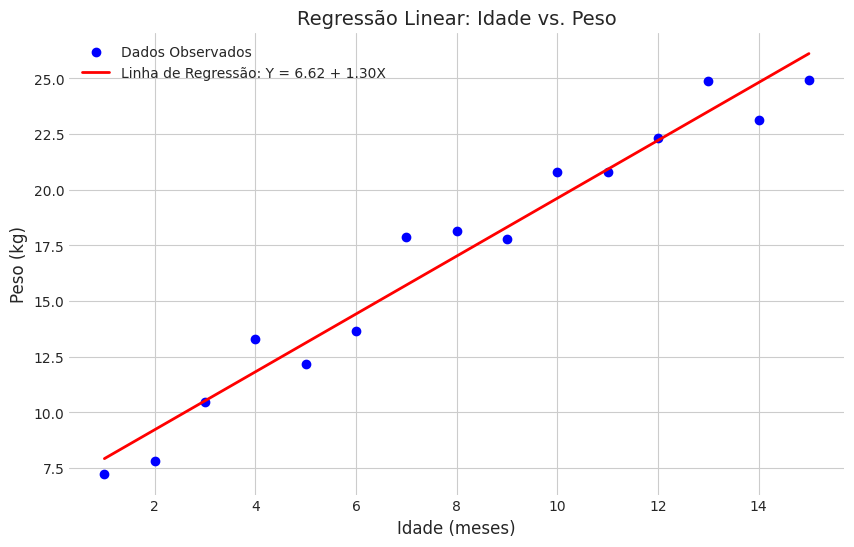

In [ ]:
# --- 4. Plotar a Linha de Regressão ---
# Gerar valores preditos (Y_hat) usando o modelo ajustado
peso_predito = intercept + slope * idade

plt.figure(figsize=(10, 6))
plt.scatter(idade, peso, color='blue', label='Dados Observados')
plt.plot(idade, peso_predito, color='red', linewidth=2, label=f'Linha de Regressão: Y = {intercept:.2f} + {slope:.2f}X')
plt.title('Regressão Linear: Idade vs. Peso')
plt.xlabel('Idade (meses)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# --- 5. Exibição dos Resultados da Regressão ---
print("\n--- Resultados da Regressão Linear ---")
print(f"Intercepto (β₀): {intercept:.4f}")
print(f"Coeficiente Angular (β₁): {slope:.4f}")
print(f"Coeficiente de Determinação (R²): {r_squared:.4f}")
print(f"P-valor do Coeficiente Angular: {p_value:.4f}")
print(f"Erro Padrão do Coeficiente Angular: {std_err:.4f}")


--- Resultados da Regressão Linear ---
Intercepto (β₀): 6.6170
Coeficiente Angular (β₁): 1.2998
Coeficiente de Determinação (R²): 0.9596
P-valor do Coeficiente Angular: 0.0000
Erro Padrão do Coeficiente Angular: 0.0740


In [ ]:
# Interpretação Biológica dos coeficientes
print("\n--- Interpretação Biológica ---")
print(f"O Intercepto ({intercept:.2f} kg) representa o peso médio estimado do animal ao 'nascer' (idade zero).")
print(f"O Coeficiente Angular ({slope:.2f} kg/mês) indica que, em média, para cada mês de aumento na idade, o peso do animal aumenta em {slope:.2f} kg.")
print(f"O R² ({r_squared*100:.2f}%) sugere que {r_squared*100:.2f}% da variação no peso dos animais pode ser explicada pela sua idade.")
if p_value < 0.05:
    print(f"O p-valor ({p_value:.4f}) é menor que 0.05, indicando que a relação linear entre idade e peso é estatisticamente significativa.")
else:
    print(f"O p-valor ({p_value:.4f}) é maior que 0.05, indicando que a relação linear entre idade e peso NÃO é estatisticamente significativa.")
print("-" * 30)


--- Interpretação Biológica ---
O Intercepto (6.62 kg) representa o peso médio estimado do animal ao 'nascer' (idade zero).
O Coeficiente Angular (1.30 kg/mês) indica que, em média, para cada mês de aumento na idade, o peso do animal aumenta em 1.30 kg.
O R² (95.96%) sugere que 95.96% da variação no peso dos animais pode ser explicada pela sua idade.
O p-valor (0.0000) é menor que 0.05, indicando que a relação linear entre idade e peso é estatisticamente significativa.
------------------------------


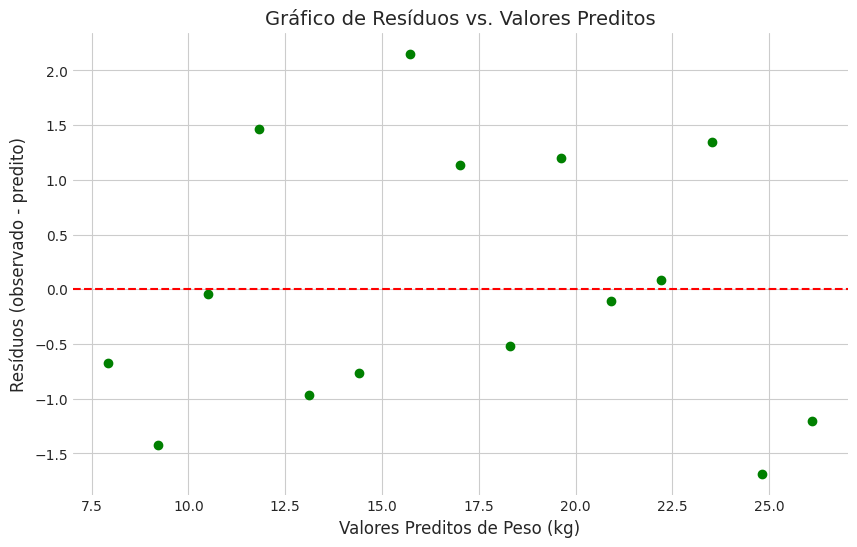

In [ ]:
# --- 6. Análise de Resíduos ---
residuos = peso - peso_predito

# Gráfico de Dispersão dos Resíduos vs. Valores Preditos
plt.figure(figsize=(10, 6))
plt.scatter(peso_predito, residuos, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos vs. Valores Preditos')
plt.xlabel('Valores Preditos de Peso (kg)')
plt.ylabel('Resíduos (observado - predito)')
plt.grid(True)
plt.show()

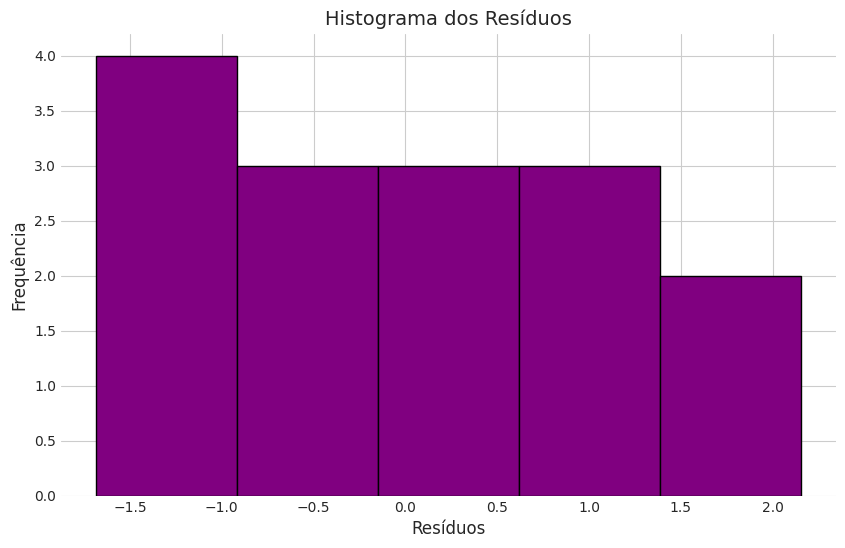


--- Análise de Resíduos ---
Verifique os gráficos de resíduos:
1. O gráfico de resíduos vs. valores preditos deve mostrar uma dispersão aleatória, sem padrões (indicando homocedasticidade e linearidade).
2. O histograma dos resíduos deve se assemelhar a uma distribuição normal (indicando normalidade dos erros).
Qualquer padrão ou desvio significativo pode indicar problemas com os pressupostos do modelo.
------------------------------


In [ ]:
# Histograma dos Resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=5, color='purple', edgecolor='black')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print("\n--- Análise de Resíduos ---")
print("Verifique os gráficos de resíduos:")
print("1. O gráfico de resíduos vs. valores preditos deve mostrar uma dispersão aleatória, sem padrões (indicando homocedasticidade e linearidade).")
print("2. O histograma dos resíduos deve se assemelhar a uma distribuição normal (indicando normalidade dos erros).")
print("Qualquer padrão ou desvio significativo pode indicar problemas com os pressupostos do modelo.")
print("-" * 30)

# Probabilidades

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm, t, chi2, f

# --- Configurações Gerais para os Gráficos ---
plt.style.use('seaborn-v0_8-darkgrid') # Estilo mais agradável
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão das figuras
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.titlesize'] = 14

Gerando gráfico para Distribuição Binomial...


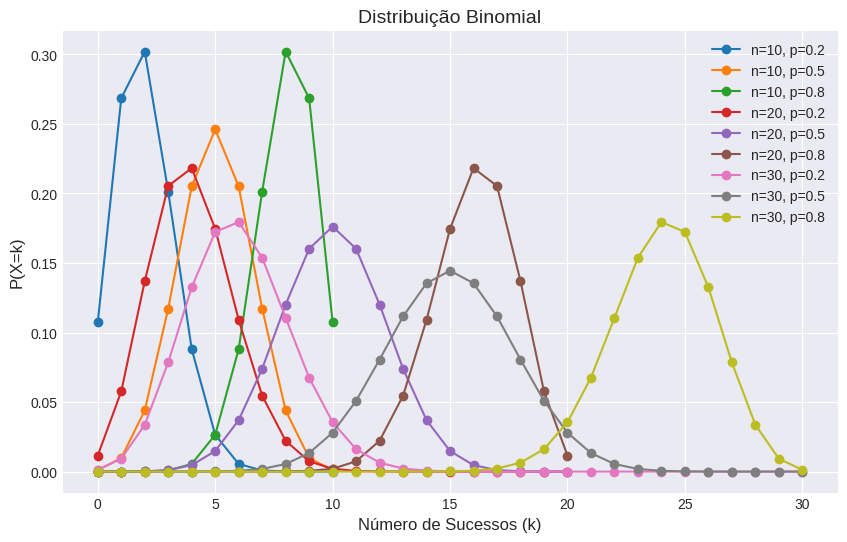

Gráfico da Distribuição Binomial gerado. Observe como 'n' e 'p' afetam a forma e simetria.



In [ ]:
# --- 1. Distribuição Binomial ---
print("Gerando gráfico para Distribuição Binomial...")
plt.figure()
n_trials = [10, 20, 30] # Número de tentativas
p_success = [0.2, 0.5, 0.8] # Probabilidade de sucesso

for n in n_trials:
    for p in p_success:
        k = np.arange(0, n + 1) # Número de sucessos
        pmf = binom.pmf(k, n, p)
        plt.plot(k, pmf, 'o-', label=f'n={n}, p={p}')

plt.title('Distribuição Binomial')
plt.xlabel('Número de Sucessos (k)')
plt.ylabel('P(X=k)')
plt.legend()
plt.grid(True)
plt.show()
print("Gráfico da Distribuição Binomial gerado. Observe como 'n' e 'p' afetam a forma e simetria.\n")

Gerando gráfico para Distribuição de Poisson...


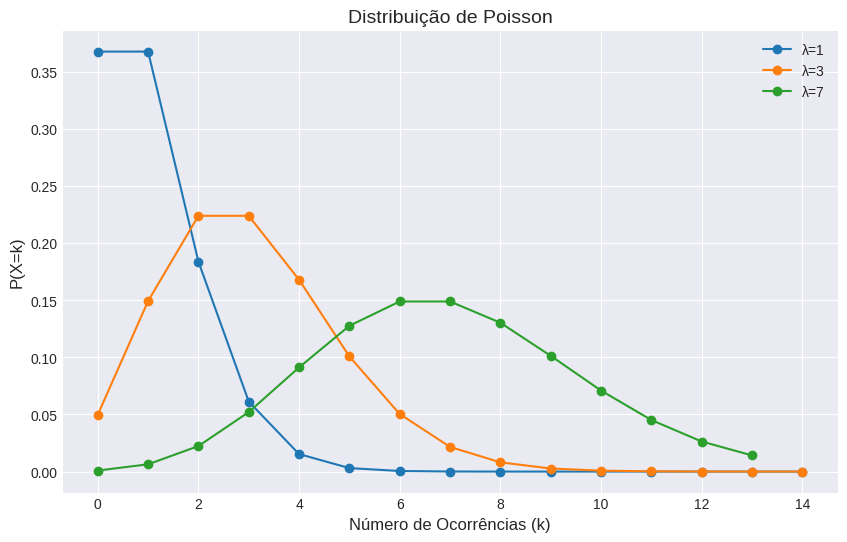

Gráfico da Distribuição de Poisson gerado. Veja como 'λ' altera o pico e a dispersão.



In [ ]:
# --- 2. Distribuição de Poisson ---
print("Gerando gráfico para Distribuição de Poisson...")
plt.figure()
lambdas = [1, 3, 7] # Taxa média de ocorrências

for l in lambdas:
    k = np.arange(0, 15 if l < 5 else 2 * l) # Número de ocorrências
    pmf = poisson.pmf(k, l)
    plt.plot(k, pmf, 'o-', label=f'λ={l}')

plt.title('Distribuição de Poisson')
plt.xlabel('Número de Ocorrências (k)')
plt.ylabel('P(X=k)')
plt.legend()
plt.grid(True)
plt.show()
print("Gráfico da Distribuição de Poisson gerado. Veja como 'λ' altera o pico e a dispersão.\n")

Gerando gráfico para Distribuição Normal...


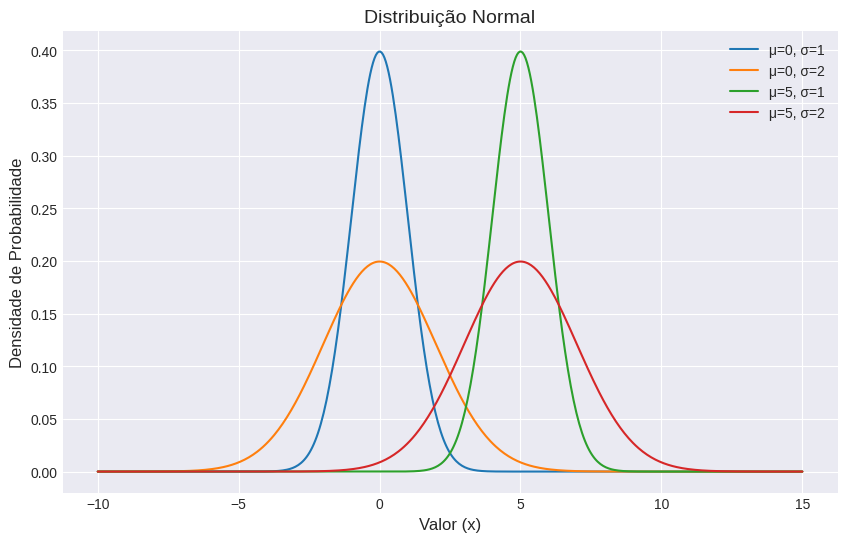

Gráfico da Distribuição Normal gerado. Note como 'μ' centraliza e 'σ' espalha a curva.



In [ ]:
# --- 3. Distribuição Normal ---
print("Gerando gráfico para Distribuição Normal...")
plt.figure()
mu_values = [0, 5] # Média
sigma_values = [1, 2] # Desvio padrão

x = np.linspace(-10, 15, 500)

for mu in mu_values:
    for sigma in sigma_values:
        pdf = norm.pdf(x, loc=mu, scale=sigma)
        plt.plot(x, pdf, label=f'μ={mu}, σ={sigma}')

plt.title('Distribuição Normal')
plt.xlabel('Valor (x)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
print("Gráfico da Distribuição Normal gerado. Note como 'μ' centraliza e 'σ' espalha a curva.\n")

Gerando gráfico para Distribuição t de Student...


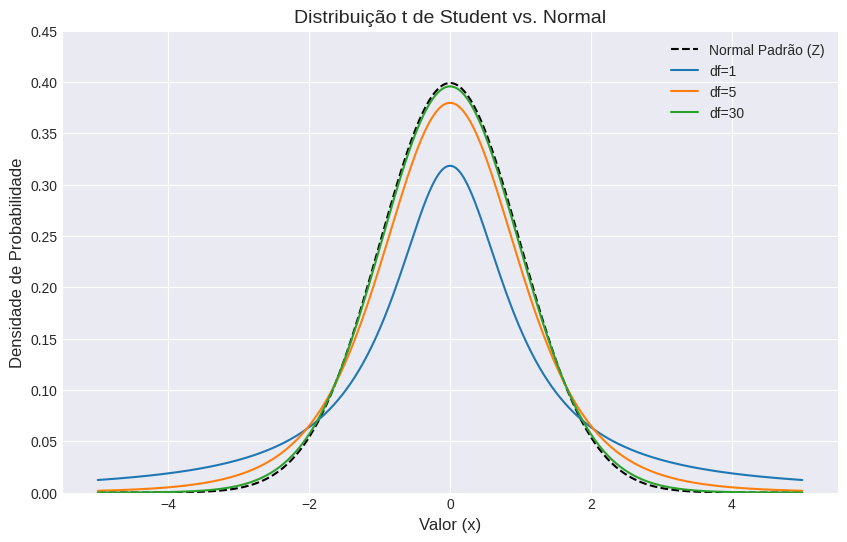

Gráfico da Distribuição t de Student gerado. Observe as 'caudas' mais pesadas para 'df' menores e a convergência para a Normal.



In [ ]:
# --- 4. Distribuição t de Student ---
print("Gerando gráfico para Distribuição t de Student...")
plt.figure()
df_values = [1, 5, 30] # Graus de Liberdade

x = np.linspace(-5, 5, 500)
# Curva normal para comparação
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'k--', label='Normal Padrão (Z)')

for df_val in df_values:
    pdf = t.pdf(x, df=df_val)
    plt.plot(x, pdf, label=f'df={df_val}')

plt.title('Distribuição t de Student vs. Normal')
plt.xlabel('Valor (x)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.45) # Ajusta o limite Y para melhor visualização
plt.show()
print("Gráfico da Distribuição t de Student gerado. Observe as 'caudas' mais pesadas para 'df' menores e a convergência para a Normal.\n")

Gerando gráfico para Distribuição Qui-Quadrado...


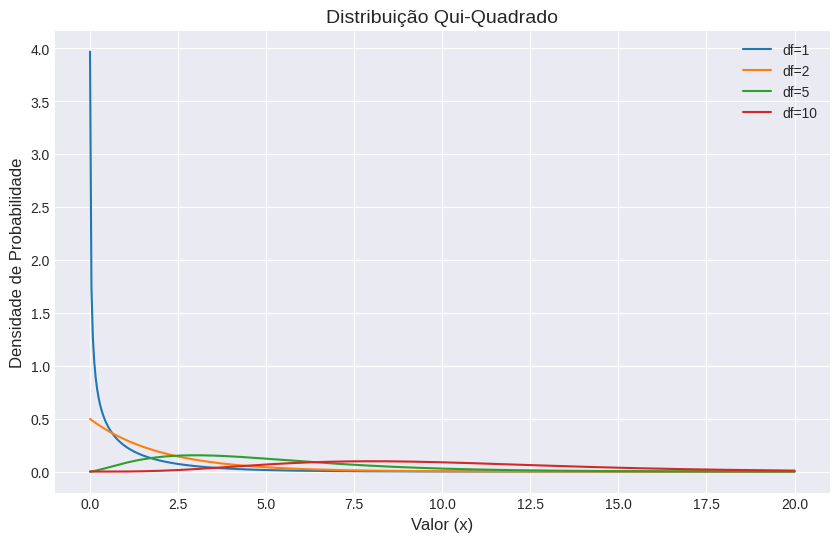

Gráfico da Distribuição Qui-Quadrado gerado. Perceba a assimetria à direita e como 'df' altera a forma.

Gerando gráfico para Distribuição F...


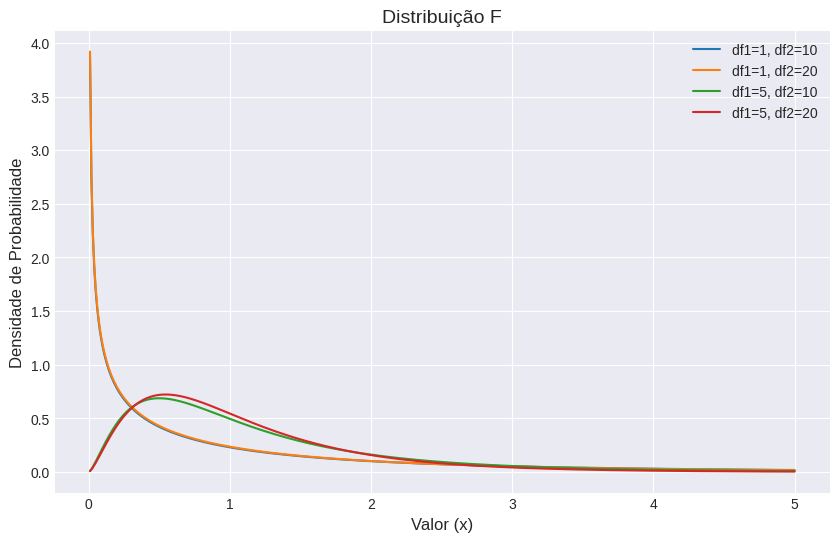

Gráfico da Distribuição F gerado. Note como os dois parâmetros de 'df' influenciam a forma da distribuição.

Demonstração das distribuições de probabilidade concluída!


In [ ]:
# --- 5. Distribuição Qui-Quadrado ---
print("Gerando gráfico para Distribuição Qui-Quadrado...")
plt.figure()
df_chi2_values = [1, 2, 5, 10] # Graus de Liberdade

x = np.linspace(0.01, 20, 500) # Começa de um valor > 0

for df_val in df_chi2_values:
    pdf = chi2.pdf(x, df=df_val)
    plt.plot(x, pdf, label=f'df={df_val}')

plt.title('Distribuição Qui-Quadrado')
plt.xlabel('Valor (x)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
print("Gráfico da Distribuição Qui-Quadrado gerado. Perceba a assimetria à direita e como 'df' altera a forma.\n")

# --- 6. Distribuição F (Fisher-Snedecor) ---
print("Gerando gráfico para Distribuição F...")
plt.figure()
df_num_values = [1, 5] # Graus de Liberdade do Numerador
df_den_values = [10, 20] # Graus de Liberdade do Denominador

x = np.linspace(0.01, 5, 500) # Começa de um valor > 0

for df1 in df_num_values:
    for df2 in df_den_values:
        pdf = f.pdf(x, dfn=df1, dfd=df2)
        plt.plot(x, pdf, label=f'df1={df1}, df2={df2}')

plt.title('Distribuição F')
plt.xlabel('Valor (x)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
print("Gráfico da Distribuição F gerado. Note como os dois parâmetros de 'df' influenciam a forma da distribuição.\n")

print("Demonstração das distribuições de probabilidade concluída!")

# Inferência

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 1. Amostragem: A Base da Coleta de Dados
A amostragem correta é crucial para garantir que suas conclusões sejam válidas. Vamos simular uma população e explorar diferentes métodos de amostragem.


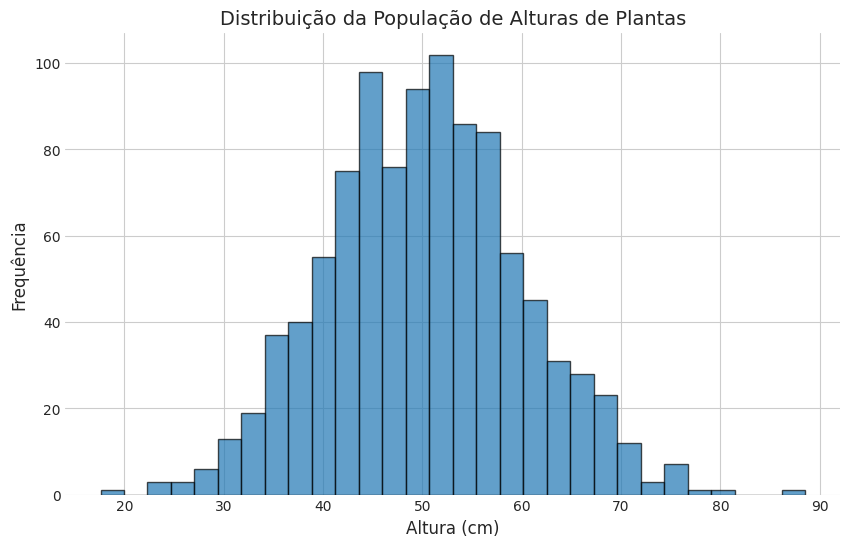

In [ ]:
# Simulação de uma população de alturas de plantas (em cm)
np.random.seed(42) # Para reprodutibilidade
populacao_alturas = np.random.normal(loc=50, scale=10, size=1000)

plt.hist(populacao_alturas, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuição da População de Alturas de Plantas')
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# --- Amostragem Aleatória Simples ---
tamanho_amostra_simples = 50
amostra_simples = np.random.choice(populacao_alturas, size=tamanho_amostra_simples, replace=False)
print(f"\nMédia da população: {np.mean(populacao_alturas):.2f}")
print(f"Média da amostra aleatória simples: {np.mean(amostra_simples):.2f}")


Média da população: 50.19
Média da amostra aleatória simples: 50.86


In [ ]:
# --- Amostragem Estratificada ---
# Vamos simular duas "variedades" de plantas com alturas ligeiramente diferentes
populacao_variedade_A = np.random.normal(loc=45, scale=8, size=500)
populacao_variedade_B = np.random.normal(loc=55, scale=7, size=500)
populacao_total = np.concatenate((populacao_variedade_A, populacao_variedade_B))

In [ ]:
# Amostrar proporcionalmente de cada variedade
tamanho_amostra_estratificada = 100
amostra_A = np.random.choice(populacao_variedade_A, size=int(tamanho_amostra_estratificada * 0.5), replace=False)
amostra_B = np.random.choice(populacao_variedade_B, size=int(tamanho_amostra_estratificada * 0.5), replace=False)
amostra_estratificada = np.concatenate((amostra_A, amostra_B))

print(f"\nMédia da população total (variedades A e B): {np.mean(populacao_total):.2f}")
print(f"Média da amostra estratificada: {np.mean(amostra_estratificada):.2f}")

# Recomendação: Sempre que possível, utilize métodos de amostragem que garantam a representatividade da sua população.
# Evite vieses que possam comprometer a validade das suas inferências.


Média da população total (variedades A e B): 50.53
Média da amostra estratificada: 50.11


### 2. Intervalos de Confiança: Estimando Parâmetros Populacionais

Intervalos de confiança nos dão uma estimativa da precisão de nossos parâmetros populacionais.

#### 2.1. Intervalo de Confiança para Uma Média

Vamos estimar a altura média de uma espécie de planta com base em uma amostra.


In [ ]:
# Dados de exemplo: alturas de uma amostra de 30 plantas
alturas_amostra = np.array([48, 52, 45, 55, 50, 49, 53, 47, 51, 46,
                            54, 48, 50, 52, 49, 53, 46, 50, 51, 47,
                            55, 48, 49, 52, 46, 50, 53, 47, 51, 49])

n = len(alturas_amostra)
media_amostra = np.mean(alturas_amostra)
desvio_padrao_amostra = np.std(alturas_amostra, ddof=1) # ddof=1 para desvio padrão da amostra (n-1)
erro_padrao = desvio_padrao_amostra / np.sqrt(n)

# Para um IC de 95%, usamos o valor t crítico
graus_liberdade = n - 1
nivel_confianca = 0.95
valor_t_critico = stats.t.ppf((1 + nivel_confianca) / 2, graus_liberdade)

margem_erro = valor_t_critico * erro_padrao
ic_inferior = media_amostra - margem_erro
ic_superior = media_amostra + margem_erro

print(f"\nAltura média da amostra: {media_amostra:.2f} cm")
print(f"Erro padrão da média: {erro_padrao:.2f} cm")
print(f"Intervalo de Confiança de {nivel_confianca*100}% para a média: [{ic_inferior:.2f}, {ic_superior:.2f}] cm")

# Recomendação: Sempre reporte o intervalo de confiança junto com a média da amostra.
# Isso fornece uma medida da precisão da sua estimativa.


Altura média da amostra: 49.87 cm
Erro padrão da média: 0.51 cm
Intervalo de Confiança de 95.0% para a média: [48.83, 50.90] cm


#### 2.2. Intervalo de Confiança para a Diferença de Duas Médias Independentes

Vamos comparar o crescimento de plantas em dois tipos de solo diferentes.


In [ ]:
# Dados de exemplo: crescimento em dois tipos de solo (em cm)
solo_A = np.array([12, 15, 13, 16, 14, 17, 12, 14, 15, 13])
solo_B = np.array([10, 11, 9, 12, 10, 11, 8, 10, 9, 11])

# Supondo variâncias populacionais desiguais (abordagem de Welch)
# stats.ttest_ind fornece o p-valor, mas para o IC, calculamos manualmente
media_A, n_A, s_A = np.mean(solo_A), len(solo_A), np.std(solo_A, ddof=1)
media_B, n_B, s_B = np.mean(solo_B), len(solo_B), np.std(solo_B, ddof=1)

diferenca_medias = media_A - media_B
erro_padrao_diferenca = np.sqrt((s_A**2 / n_A) + (s_B**2 / n_B))

# Graus de liberdade aproximados para o teste de Welch-Satterthwaite
df = ((s_A**2 / n_A + s_B**2 / n_B)**2 /
      ((s_A**2 / n_A)**2 / (n_A - 1) + (s_B**2 / n_B)**2 / (n_B - 1)))

valor_t_critico_diff = stats.t.ppf((1 + nivel_confianca) / 2, df)
margem_erro_diff = valor_t_critico_diff * erro_padrao_diferenca
ic_inferior_diff = diferenca_medias - margem_erro_diff
ic_superior_diff = diferenca_medias + margem_erro_diff

print(f"\nMédia Solo A: {media_A:.2f}, Média Solo B: {media_B:.2f}")
print(f"Diferença das médias: {diferenca_medias:.2f}")
print(f"Intervalo de Confiança de {nivel_confianca*100}% para a diferença de médias: [{ic_inferior_diff:.2f}, {ic_superior_diff:.2f}]")

# Recomendação: Quando comparar duas médias, sempre considere se as amostras são independentes ou dependentes.
# A escolha do teste e do cálculo do IC depende disso.


Média Solo A: 14.10, Média Solo B: 10.10
Diferença das médias: 4.00
Intervalo de Confiança de 95.0% para a diferença de médias: [2.63, 5.37]


#### 2.3. Intervalo de Confiança para Uma Proporção

Estimando a proporção de sementes que germinam.



In [ ]:
# Dados de exemplo: 75 sementes germinaram de 100 plantadas
sucessos = 75
n_sementes = 100
proporcao_amostra = sucessos / n_sementes

# Para um IC de proporção (normal approximation method)
z_critico = stats.norm.ppf((1 + nivel_confianca) / 2)
erro_padrao_proporcao = np.sqrt((proporcao_amostra * (1 - proporcao_amostra)) / n_sementes)
margem_erro_proporcao = z_critico * erro_padrao_proporcao

ic_inferior_prop = proporcao_amostra - margem_erro_proporcao
ic_superior_prop = proporcao_amostra + margem_erro_proporcao

print(f"\nProporção de germinação na amostra: {proporcao_amostra:.2f}")
print(f"Intervalo de Confiança de {nivel_confianca*100}% para a proporção: [{ic_inferior_prop:.2f}, {ic_superior_prop:.2f}]")

# Recomendação: Para proporções, especialmente com amostras pequenas ou proporções muito próximas de 0 ou 1,
# considere métodos mais robustos como o intervalo de Wilson para maior precisão.


Proporção de germinação na amostra: 0.75
Intervalo de Confiança de 95.0% para a proporção: [0.67, 0.83]


### 3. Testes de Hipóteses: Tomando Decisões Baseadas em Dados

Testes de hipóteses nos ajudam a decidir se uma observação é estatisticamente significativa.

#### 3.1. Testes para Uma Média

Testar se a temperatura média de um lago é diferente de um valor histórico (e.g., $20^\circ C$).


In [ ]:
# Dados de exemplo: temperaturas de 25 amostras de água de um lago
temperaturas_lago = np.array([21.2, 19.8, 20.5, 20.1, 19.5, 20.7, 21.0, 19.9, 20.3, 20.0,
                              20.6, 20.2, 19.7, 20.8, 20.4, 21.1, 19.6, 20.9, 20.5, 20.1,
                              19.4, 20.3, 20.7, 20.0, 21.3])

media_hipotetica = 20 # Temperatura histórica de referência

# Realizando o teste t de uma amostra
t_statistic, p_value = stats.ttest_1samp(temperaturas_lago, media_hipotetica)

print(f"\nTeste t para uma média:")
print(f"Hipótese Nula (H0): Temperatura média do lago = {media_hipotetica}°C")
print(f"Estatística t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

alfa = 0.05
if p_value < alfa:
    print(f"Com p-valor < {alfa}, rejeitamos a H0. Há evidências de que a temperatura média do lago é diferente de {media_hipotetica}°C.")
else:
    print(f"Com p-valor >= {alfa}, não rejeitamos a H0. Não há evidências suficientes para dizer que a temperatura média do lago é diferente de {media_hipotetica}°C.")

# Recomendação: Sempre defina suas hipóteses (nula e alternativa) e o nível de significância (alfa) antes de realizar o teste.
# A interpretação do p-valor é crucial: ele não é a probabilidade de H0 ser verdadeira.


Teste t para uma média:
Hipótese Nula (H0): Temperatura média do lago = 20°C
Estatística t: 3.189
Valor p: 0.004
Com p-valor < 0.05, rejeitamos a H0. Há evidências de que a temperatura média do lago é diferente de 20°C.


## 3.2. Testes para Duas Médias Independentes (Teste t de Student)

Comparar o peso médio de machos e fêmeas de uma espécie de roedor.


In [ ]:
# Dados de exemplo: peso (g) de roedores machos e fêmeas
machos = np.array([25, 27, 26, 28, 29, 24, 26, 27, 25, 28])
femeas = np.array([22, 24, 23, 25, 21, 23, 24, 22, 23, 21])

# Verificando a igualdade de variâncias (pré-requisito para o teste t 'padrão')
# Usaremos o teste de Levene, mais robusto a não-normalidade do que o teste F
levene_statistic, levene_p_value = stats.levene(machos, femeas)
print(f"\nTeste de Levene para igualdade de variâncias:")
print(f"Estatística de Levene: {levene_statistic:.3f}, p-valor: {levene_p_value:.3f}")

equal_var = levene_p_value > alfa # Se p-valor > alfa, não rejeitamos H0 de igualdade de variâncias

# Realizando o teste t de duas amostras independentes
t_statistic_ind, p_value_ind = stats.ttest_ind(machos, femeas, equal_var=equal_var)

print(f"\nTeste t para duas médias independentes (Assumindo equal_var={equal_var}):")
print(f"Estatística t: {t_statistic_ind:.3f}")
print(f"Valor p: {p_value_ind:.3f}")

if p_value_ind < alfa:
    print(f"Com p-valor < {alfa}, rejeitamos a H0. Há evidências de que o peso médio de machos e fêmeas é diferente.")
else:
    print(f"Com p-valor >= {alfa}, não rejeitamos a H0. Não há evidências suficientes para dizer que o peso médio difere.")

# Visualização da distribuição dos grupos
data = pd.DataFrame({'Peso': np.concatenate([machos, femeas]),
                     'Gênero': ['Macho']*len(machos) + ['Fêmea']*len(femeas)})




Teste de Levene para igualdade de variâncias:
Estatística de Levene: 0.698, p-valor: 0.414

Teste t para duas médias independentes (Assumindo equal_var=True):
Estatística t: 5.687
Valor p: 0.000
Com p-valor < 0.05, rejeitamos a H0. Há evidências de que o peso médio de machos e fêmeas é diferente.


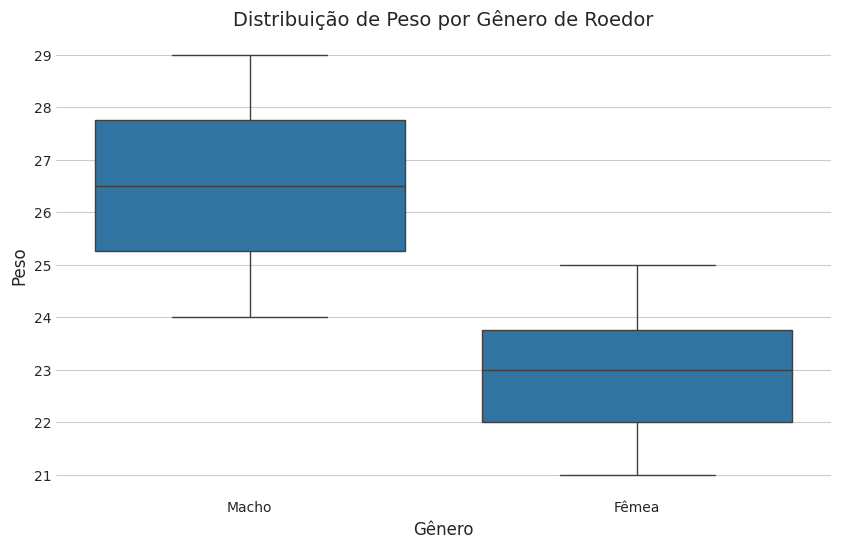

In [ ]:
sns.boxplot(x='Gênero', y='Peso', data=data)
plt.title('Distribuição de Peso por Gênero de Roedor')
plt.show()

# Recomendação: Sempre verifique as suposições do teste (normalidade e igualdade de variâncias para o t-test clássico).
# Se as suposições não forem atendidas, considere testes não paramétricos (e.g., Mann-Whitney U).

## 3.3. Testes para Duas Médias Dependentes (Teste t Pareado)

Avaliar o efeito de um tratamento em amostras pareadas (e.g., antes e depois).


In [ ]:
# Dados de exemplo: Contagem de células antes e depois de um tratamento
antes = np.array([100, 105, 98, 110, 102, 103, 99, 101, 104, 106])
depois = np.array([95, 100, 90, 105, 98, 97, 92, 96, 99, 101])

# Realizando o teste t pareado
t_statistic_paired, p_value_paired = stats.ttest_rel(antes, depois)

print(f"\nTeste t para duas médias dependentes (pareadas):")
print(f"Estatística t: {t_statistic_paired:.3f}")
print(f"Valor p: {p_value_paired:.3f}")

if p_value_paired < alfa:
    print(f"Com p-valor < {alfa}, rejeitamos a H0. Há evidências de que o tratamento teve um efeito significativo na contagem de células.")
else:
    print(f"Com p-valor >= {alfa}, não rejeitamos a H0. Não há evidências suficientes para dizer que o tratamento teve um efeito significativo.")

# Recomendação: Use testes pareados quando as observações estiverem relacionadas,
# como medições do mesmo indivíduo em diferentes condições ou momentos.


Teste t para duas médias dependentes (pareadas):
Estatística t: 14.758
Valor p: 0.000
Com p-valor < 0.05, rejeitamos a H0. Há evidências de que o tratamento teve um efeito significativo na contagem de células.


## 3.4. Testes para Variâncias (Teste F para Duas Variâncias)

Comparar a variabilidade genética entre duas populações isoladas.


In [ ]:
# Dados de exemplo: Medida de variabilidade genética (ex: número de alelos)
pop_A = np.array([5, 7, 6, 8, 5, 7, 6, 9, 8, 7])
pop_B = np.array([3, 5, 4, 3, 6, 4, 5, 3, 4, 5])

# Realizando o teste F para igualdade de variâncias
# stats.f_oneway_ind (ou equivalentemente stats.bartlett ou stats.levene)
# Para duas variâncias especificamente, podemos fazer manualmente ou usar o teste de Levene novamente
# O teste F puro para duas variâncias (assumindo normalidade) pode ser feito assim:
F_statistic = np.var(pop_A, ddof=1) / np.var(pop_B, ddof=1) # Ou vice-versa, o maior pelo menor
df1 = len(pop_A) - 1
df2 = len(pop_B) - 1
p_value_F = 2 * min(stats.f.cdf(F_statistic, df1, df2), 1 - stats.f.cdf(F_statistic, df1, df2))

print(f"\nTeste F para duas variâncias:")
print(f"Estatística F: {F_statistic:.3f}")
print(f"Valor p: {p_value_F:.3f}")

if p_value_F < alfa:
    print(f"Com p-valor < {alfa}, rejeitamos a H0. Há evidências de que as variâncias genéticas das populações são diferentes.")
else:
    print(f"Com p-valor >= {alfa}, não rejeitamos a H0. Não há evidências suficientes para dizer que as variâncias genéticas diferem.")

# Recomendação: Lembre-se que o teste F é sensível à normalidade.
# Para dados não normais, o teste de Levene é uma alternativa mais robusta.


Teste F para duas variâncias:
Estatística F: 1.625
Valor p: 0.481
Com p-valor >= 0.05, não rejeitamos a H0. Não há evidências suficientes para dizer que as variâncias genéticas diferem.


## 3.5. Testes para Proporções (Teste Qui-Quadrado de Independência)

Avaliar se a prevalência de uma doença é independente do grupo sanguíneo.


In [ ]:
# Dados de exemplo: Tabela de contingência (Doença vs. Grupo Sanguíneo)
# Linhas: Com Doença, Sem Doença
# Colunas: Grupo A, Grupo B, Grupo O
dados_doenca = np.array([[30, 20, 50],  # Com Doença
                         [70, 80, 150]]) # Sem Doença

chi2_statistic, p_value_chi2, df_chi2, expected_freq = stats.chi2_contingency(dados_doenca)

print(f"\nTeste Qui-Quadrado de Independência:")
print(f"Estatística Qui-Quadrado: {chi2_statistic:.3f}")
print(f"Valor p: {p_value_chi2:.3f}")
print(f"Graus de liberdade: {df_chi2}")
print(f"Frequências esperadas:\n{expected_freq}")

if p_value_chi2 < alfa:
    print(f"Com p-valor < {alfa}, rejeitamos a H0. Há evidências de que a prevalência da doença NÃO é independente do grupo sanguíneo.")
else:
    print(f"Com p-valor >= {alfa}, não rejeitamos a H0. Não há evidências suficientes para dizer que a prevalência da doença NÃO é independente do grupo sanguíneo.")

# Recomendação: O teste Qui-Quadrado é muito útil para dados categóricos.
# Certifique-se de que as contagens esperadas em cada célula não sejam muito baixas (geralmente > 5) para que a aproximação seja válida.


Teste Qui-Quadrado de Independência:
Estatística Qui-Quadrado: 2.667
Valor p: 0.264
Graus de liberdade: 2
Frequências esperadas:
[[ 25.  25.  50.]
 [ 75.  75. 150.]]
Com p-valor >= 0.05, não rejeitamos a H0. Não há evidências suficientes para dizer que a prevalência da doença NÃO é independente do grupo sanguíneo.


## Conclusão e Próximos Passos

Este script aborda os pilares da inferência estatística, essenciais para qualquer biólogo. Lembre-se que a **interpretação biológica** dos resultados estatísticos é tão importante quanto a significância numérica.

**Recomendações Finais:**

* **Validação de Suposições:** Antes de aplicar qualquer teste paramétrico, **sempre verifique as suposições dos dados** (normalidade, homocedasticidade). Ferramentas como testes de Shapiro-Wilk (normalidade) ou gráficos Q-Q podem ser úteis.
* **Testes Não Paramétricos:** Se as suposições não forem atendidas, explore testes não paramétricos (e.g., Mann-Whitney U para duas médias independentes, Wilcoxon para duas médias dependentes, Kruskal-Wallis para múltiplas médias).
* **Poder Estatístico e Tamanho da Amostra:** Compreenda a importância de planejar o tamanho da amostra antes de coletar dados, para garantir que seu estudo tenha poder suficiente para detectar um efeito real, se ele existir.
* **Visualização de Dados:** Sempre visualize seus dados. Gráficos de caixa, histogramas e gráficos de dispersão fornecem insights valiosos que os números sozinhos não revelam.

A prática leva à perfeição. Experimente com seus próprios dados, manipule os parâmetros e observe como os resultados mudam. A estatística é uma ferramenta poderosa; use-a com sabedoria para desvendar os mistérios da biologia!

